In [53]:
#Test use of MS azure text analytics
import requests
import json
#pprint for formatting JSON
from pprint import pprint as pp #hehehehehe
import os
import pandas as pd
from pandas.io.json import json_normalize
key = 'TEXT_ANALYTICS_SUBSCRIPTION_KEY'
if not key in os.environ:
    raise Exception("Please set/export the environment variable: {}".format(key))
sub_key = os.environ[key]

endpoint_name = 'TEXT_ANALYTICS_ENDPOINT'
if not endpoint_name in os.environ:
    raise Exception('Please set/export the environment variable: {}'.format(endpoint_name))
endpoint = os.environ[endpoint_name]

In [54]:
data = pd.read_csv('combined_csv.csv', encoding = 'latin')
data.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,2753146444,TODAYCLEVELAND,Five morning fires in Cleveland; Browns coach ...,United States,English,9/23/2015 17:33,9/23/2015 17:33,11401,14100,9370,...,local,0,NewsFeed,0,2753146444,646739089211961344,http://twitter.com/TodayCleveland/statuses/646...,NaN,NaN,NaN
1,1656685598,JEANNEMCCARTHY0,#IS Sharia Court murders 600 Yezidis #Islam i...,United States,English,5/2/2015 21:48,5/2/2015 21:48,310,204,353,...,Right,1,RightTroll,0,1656685598,594619372376698881,http://twitter.com/JeanneMccarthy0/statuses/59...,https://twitter.com/Jenn_Abrams/status/5945309...,NaN,NaN
2,2571870453,DETROITDAILYNEW,"5 Dallas officers slain, deadliest day for pol...",United States,English,7/8/2016 16:00,7/8/2016 16:01,14136,18507,26187,...,local,0,NewsFeed,0,2571870453,751445976921960448,http://twitter.com/DetroitDailyNew/statuses/75...,http://bit.ly/29BZpmw,NaN,NaN
3,1850866398,BRICEGELLER,Why chai tea is good for you... https://t.co/k...,United States,English,12/8/2016 18:36,12/8/2016 18:36,843,830,1719,...,Left,1,LeftTroll,0,1850866398,806930516502941696,http://twitter.com/1850866398/statuses/8069305...,http://bit.ly/2gDHg70,NaN,NaN
4,2504171440,PATRIOTKA_RUSI,'Germany NSA spy scandal will give boost to na...,United States,English,12/3/2016 11:06,12/3/2016 11:06,85,4574,1326,...,Russian,1,NonEnglish,0,2504171440,805005301393063936,http://twitter.com/2504171440/statuses/8050053...,https://twitter.com/RT_com/status/804989274718...,http://on.rt.com/7wpq,NaN


In [55]:
# #key_var_name = 'TRANSLATOR_TEXT_SUBSCRIPTION_KEY'
# if not key_var_name in os.environ:
#     raise Exception('Please set/export the environment variable: {}'.format(key_var_name))
# trans_sub_key = os.environ[key_var_name]

# endpoint_var_name = 'TRANSLATOR_TEXT_ENDPOINT'
# if not endpoint_var_name in os.environ:
#     raise Exception('Please set/export the environment variable: {}'.format(endpoint_var_name))
# Trans_endpoint = os.environ[endpoint_var_name]
trans_sub_key = '3eeb86981ea34b198ea2132adb619cf1'
#Trans_endpoint = 'https://huffmantranslator.cognitiveservices.azure.com/sts/v1.0/issuetoken'
Trans_endpoint = "https://api.cognitive.microsofttranslator.com/"

In [56]:
#keywords analysis
keyphrase_url = endpoint + "/text/analytics/v2.1/keyphrases"
def keyword(document):
    headers = {"Ocp-Apim-Subscription-Key": sub_key}
    response = requests.post(keyphrase_url, headers=headers, json=documents)
    key_phrases = response.json()
    words = key_phrases['documents']
    return words

In [57]:
#sentiment analysis
sentiment_url = endpoint + "/text/analytics/v2.1/sentiment"
def get_sentiment(document):
    headers = {"Ocp-Apim-Subscription-Key": sub_key}
    response = requests.post(sentiment_url, headers=headers, json=documents)
    sentiments = response.json()
    sent_val = sentiments['documents']
    return sent_val

In [58]:
#entity extraction
entities_url = endpoint + "/text/analytics/v2.1/entities"
def extract_entities(document):
    headers = {"Ocp-Apim-Subscription-Key": sub_key}
    response = requests.post(entities_url, headers=headers, json=documents)
    entities = response.json()
    entity_doc = entities['documents']
    ents = entity_doc[0]['entities']
    return ents

In [59]:
import uuid

path = '/translate?api-version=3.0'
params = '&to=en'
constructed_url = Trans_endpoint + path + params
def get_translation(text):
    headers = {
    'Ocp-Apim-Subscription-Key': trans_sub_key,
#     'Ocp-Apim-Subscription-Region' : 'centralus',
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
            }#end headers
    body = [{
        'text': text
            }]
    request = requests.post(constructed_url, headers=headers, json=body)
    translation = request.json()
    trans_txt = translation[0]['translations'][0]['text']
    return trans_txt



In [60]:
# # text = 'Меркель объявила решение проблемы мигрантов '
# text = 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt'
# documents = {"documents": [{"id": "1", "language": "en","text": text}
#                       ]}
                           
# ents = extract_entities(documents)
# # # sent
# # sent = get_translation(text)
# ents

In [61]:
# ents = ents[0]['entities']
# ents_df = json_normalize(ents)
# ents_df
# #trans_sent = json.loads(sent)
# #trans_sent['translations']


In [65]:
authors = []
dates = []
sentiment = []
category = []
keywords = []
entities = []
entities_types = []
langs = []
regions = []
followers = []
content = []
for idx,x in data.iterrows():
    text = x['content']
    lang = x['language']
    if lang != 'English':
        text = get_translation(text)#call Azure text translation API
    documents = {"documents": [
    {"id": "1", "language": "en",
        "text": text}
    ]}
    words = keyword(documents)
    keyw = json_normalize(words)#df with flattened json
    sent = get_sentiment(documents)
    sents = json_normalize(sent)#df with flattened json
    ents = extract_entities(documents)
    ents_df = json_normalize(ents)#df with flattened json
    try:
        ent_names = ents_df['name'].tolist()
    except KeyError:
        ent_names = []
    try:
        ent_types = ents_df['type'].tolist()
    except KeyError:
        ent_types = []
    authors.append(x['author'])
    dates.append(x['publish_date'])
    category.append(x['account_category'])
    langs.append(x['language'])
    regions.append(x['region'])
    followers.append(x['followers'])
    content.append(text)
    sentiment.append(sents.score[0])
    keywords.append(keyw.keyPhrases[0])
    entities.append(ent_names)
    entities_types.append(ent_types)

In [66]:
output_df = pd.DataFrame()
output_df['author'] = authors
output_df['dates'] = dates
output_df['category'] = category
output_df['language'] = langs
output_df['regions'] = regions
output_df['followers'] = followers
output_df['sentiment_value'] = sentiment
output_df['keywords'] = keywords
output_df['entity_names'] = entities
output_df['entity_types'] = entities_types
output_df['tweet_text_translated'] = content

output_df

,author,dates,category,language,regions,followers,sentiment_value,keywords,entity_names,entity_types,tweet_text_translated
0,TODAYCLEVELAND,9/23/2015 17:33,NewsFeed,English,United States,14100,0.875304,"[Browns coach, Akron, Northeast Ohio News, Cle...","[Five morning, Cleveland Browns, Cleveland, Br...","[DateTime, Organization, Location, Organizatio...",Five morning fires in Cleveland; Browns coach ...
1,JEANNEMCCARTHY0,5/2/2015 21:48,RightTroll,English,United States,204,0.500000,"[Islam, Yezidis, Sharia Court murders, religio...","[Islamic State of Iraq and the Levant, Sharia,...","[Organization, Other, Organization, Quantity, ...",#IS Sharia Court murders 600 Yezidis #Islam i...
2,DETROITDAILYNEW,7/8/2016 16:00,NewsFeed,English,United States,18507,0.040053,"[police, deadliest day, Dallas officers, Gunmen]","[5, Dallas, since 9/11, five, https://t.co/x7w...","[Quantity, Location, DateTime, Quantity, URL]","5 Dallas officers slain, deadliest day for pol..."
3,BRICEGELLER,12/8/2016 18:36,LeftTroll,English,United States,830,0.890611,[chai tea],"[Tea, https://t.co/kk7VyaSDAy]","[Other, URL]",Why chai tea is good for you... https://t.co/k...
4,PATRIOTKA_RUSI,12/3/2016 11:06,NonEnglish,English,United States,4574,0.500000,"[boost, Germany NSA spy scandal, Op-Edge]","[Germany, National Security Agency, Dominican ...","[Location, Organization, Organization, Other, ...",'Germany NSA spy scandal will give boost to na...
...,...,...,...,...,...,...,...,...,...,...,...
495,RH0LBR00K,12/13/2016 13:09,RightTroll,English,United States,1892,0.157944,"[terrorism attacks, property, Trump, business]","[Donald Trump, until January]","[Person, DateTime]",Trump announces he is delaying until January r...
496,TTLENLEN,10/28/2016 22:22,NonEnglish,English,United States,116,0.922314,"[shorts ï, RomaAcorn]",[],[],'@RomaAcorn loved those shorts ï¿½ï¿½'
497,VYSEKII1,9/5/2015 13:13,NonEnglish,Russian,United Arab Emirates,732,0.500000,"[ð ̧ðμ Ð, ð ̧ð ̧, Ñ Ð1, Ñ Ð3, Ñð ̧ð3, ññð, Ñðμ...","[°, 1]","[Quantity, Quantity]",Ððμñð º ÐμÐ» Ñ Ð3/4ð ± ññð ² Ð ̧ð» Ð ° Ñðμñðμð...
498,REDLANEWS,2/13/2016 18:11,RightTroll,English,United States,4113,0.500000,"[WakeUpAmerica, Clinton staffer âblackmailed...","[Clinton, https://t.co/mWJFdkYeW2, https://t.c...","[Person, URL, URL]",How a Clinton staffer âblackmailedâ report...


Visualize Results now!

In [70]:
!pip install wordcloud

In [73]:
%matplotlib inline

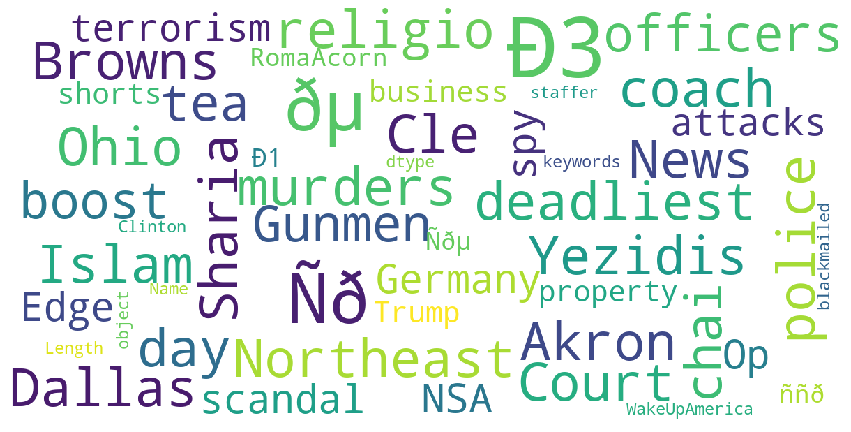

In [74]:
#This will be wordcloud of most frequent terms from keywords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(output_df['keywords'])

In [80]:
#Categorize and summarize sentiment by category
#0-.2 = Negative
#.21 - .4 = Moderately negative
# .41-.6 = neutral
#.61-.8 = moderately positive
#.81 -1 = positive
output_df['Sentiment_Cat'] = pd.cut(output_df['sentiment_value'], bins=[0, .21, .41, .61,.81,1.01],
                                    include_lowest=True,
                                    labels=['Strong Negative', 'Moderately Negative', 
                                            'Neutral', 'Moderately Positive', 'Strong Positive'])
output_df.Sentiment_Cat.value_counts()

Neutral                265
Strong Positive         79
Strong Negative         73
Moderately Positive     53
Moderately Negative     30
Name: Sentiment_Cat, dtype: int64

Category and counts for sentiments categories

In [81]:
for i in output_df.category.unique():
    subset_df = output_df[output_df.category == i]#get subset for i
    print('Category is {0}: '.format(str(i)))
    print('Counts are:')
    print(subset_df.Sentiment_Cat.value_counts())

Category is NewsFeed: 
Counts are:
Neutral                50
Strong Negative        22
Moderately Positive    12
Strong Positive         7
Moderately Negative     6
Name: Sentiment_Cat, dtype: int64
Category is RightTroll: 
Counts are:
Neutral                36
Strong Positive        30
Strong Negative        23
Moderately Positive    15
Moderately Negative     8
Name: Sentiment_Cat, dtype: int64
Category is LeftTroll: 
Counts are:
Neutral                26
Strong Positive        20
Strong Negative        12
Moderately Positive     9
Moderately Negative     8
Name: Sentiment_Cat, dtype: int64
Category is NonEnglish: 
Counts are:
Neutral                132
Moderately Positive     10
Strong Positive          8
Strong Negative          5
Moderately Negative      1
Name: Sentiment_Cat, dtype: int64
Category is HashtagGamer: 
Counts are:
Neutral                13
Strong Positive        12
Strong Negative         7
Moderately Negative     5
Moderately Positive     4
Name: Sentiment_Cat, dtyp

In [84]:
#Top 10 entities found in the tweets
names = output_df.entity_names
li_all_ents = []
for i in names:
    for j in i:
        li_all_ents.append(j)
all_ents = pd.DataFrame({'Entities' : li_all_ents})
Top_ents = all_ents.Entities.value_counts()
Top_ents.head(10)

°               117
3                84
4                66
1                65
2                21
Donald Trump     18
£                16
3/4              15
now               9
Barack Obama      8
Name: Entities, dtype: int64

In [92]:
top20 = Top_ents.head(20)


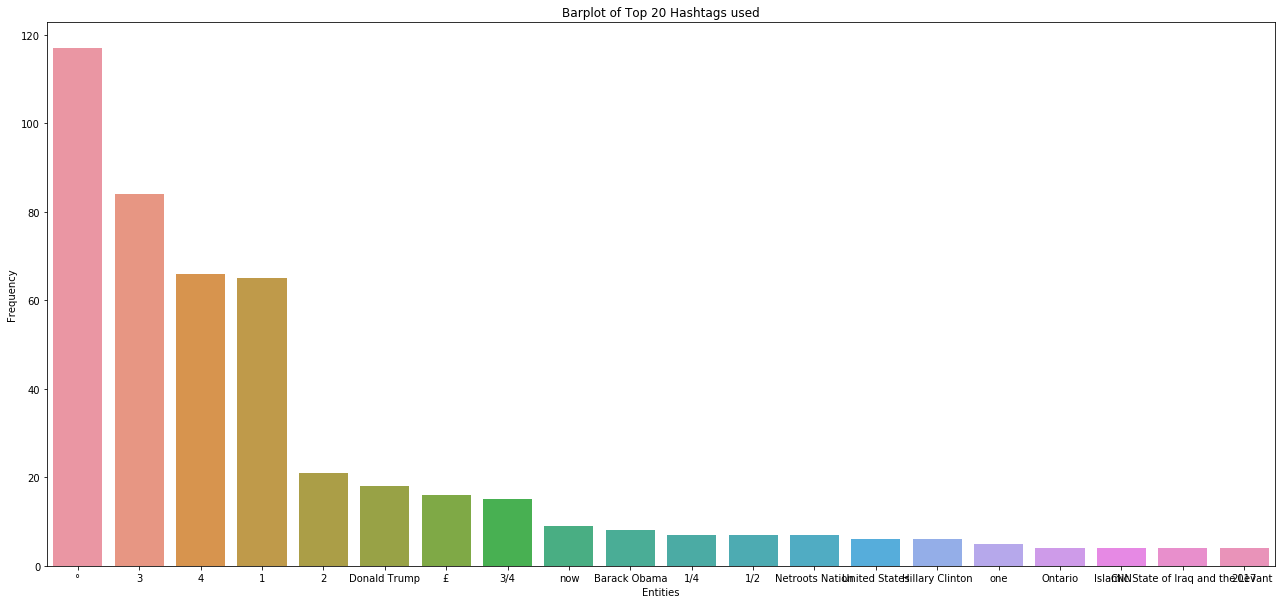

In [108]:
#visualize top ents
import seaborn as sns
N = 20
# seaborn countplot on the top N hashtags
plt.figure(figsize=(22,10))
sns.set_palette('PuBuGn_d')
sns.barplot(x = list(top20.index), y = top20)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.show()

Top users by tweets in dataset

In [109]:
output_df

,author,dates,category,language,regions,followers,sentiment_value,keywords,entity_names,entity_types,tweet_text_translated,Sentiment_Cat
0,TODAYCLEVELAND,9/23/2015 17:33,NewsFeed,English,United States,14100,0.875304,"[Browns coach, Akron, Northeast Ohio News, Cle...","[Five morning, Cleveland Browns, Cleveland, Br...","[DateTime, Organization, Location, Organizatio...",Five morning fires in Cleveland; Browns coach ...,Strong Positive
1,JEANNEMCCARTHY0,5/2/2015 21:48,RightTroll,English,United States,204,0.500000,"[Islam, Yezidis, Sharia Court murders, religio...","[Islamic State of Iraq and the Levant, Sharia,...","[Organization, Other, Organization, Quantity, ...",#IS Sharia Court murders 600 Yezidis #Islam i...,Neutral
2,DETROITDAILYNEW,7/8/2016 16:00,NewsFeed,English,United States,18507,0.040053,"[police, deadliest day, Dallas officers, Gunmen]","[5, Dallas, since 9/11, five, https://t.co/x7w...","[Quantity, Location, DateTime, Quantity, URL]","5 Dallas officers slain, deadliest day for pol...",Strong Negative
3,BRICEGELLER,12/8/2016 18:36,LeftTroll,English,United States,830,0.890611,[chai tea],"[Tea, https://t.co/kk7VyaSDAy]","[Other, URL]",Why chai tea is good for you... https://t.co/k...,Strong Positive
4,PATRIOTKA_RUSI,12/3/2016 11:06,NonEnglish,English,United States,4574,0.500000,"[boost, Germany NSA spy scandal, Op-Edge]","[Germany, National Security Agency, Dominican ...","[Location, Organization, Organization, Other, ...",'Germany NSA spy scandal will give boost to na...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
495,RH0LBR00K,12/13/2016 13:09,RightTroll,English,United States,1892,0.157944,"[terrorism attacks, property, Trump, business]","[Donald Trump, until January]","[Person, DateTime]",Trump announces he is delaying until January r...,Strong Negative
496,TTLENLEN,10/28/2016 22:22,NonEnglish,English,United States,116,0.922314,"[shorts ï, RomaAcorn]",[],[],'@RomaAcorn loved those shorts ï¿½ï¿½',Strong Positive
497,VYSEKII1,9/5/2015 13:13,NonEnglish,Russian,United Arab Emirates,732,0.500000,"[ð ̧ðμ Ð, ð ̧ð ̧, Ñ Ð1, Ñ Ð3, Ñð ̧ð3, ññð, Ñðμ...","[°, 1]","[Quantity, Quantity]",Ððμñð º ÐμÐ» Ñ Ð3/4ð ± ññð ² Ð ̧ð» Ð ° Ñðμñðμð...,Neutral
498,REDLANEWS,2/13/2016 18:11,RightTroll,English,United States,4113,0.500000,"[WakeUpAmerica, Clinton staffer âblackmailed...","[Clinton, https://t.co/mWJFdkYeW2, https://t.c...","[Person, URL, URL]",How a Clinton staffer âblackmailedâ report...,Neutral


In [110]:
top_auths = output_df.author.value_counts()

In [111]:
top_auths

ROOMOFRUMOR        8
TODAYPITTSBURGH    8
CHRIXMORGAN        7
EXQUOTE            7
SPECIALAFFAIR      7
                  ..
CHARMANT_ANIS      1
POLITEXPERTNET     1
EMELDDTRS          1
NEW_INF0RM         1
ZZZACHARYZZZ       1
Name: author, Length: 309, dtype: int64

In [112]:
top5_auths = top_auths.head(5)

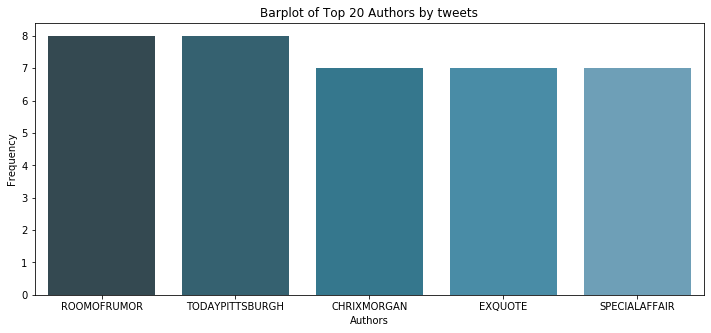

In [114]:
# seaborn countplot on the top 5 authors
plt.figure(figsize=(12,5))
sns.set_palette('PuBuGn_d')
sns.barplot(x = list(top5_auths.index), y = top5_auths)
plt.title('Barplot of Top ' + str(N) + ' Authors by tweets')
plt.xlabel('Authors')
plt.ylabel('Frequency')
plt.show()

Top 5 regions of tweets

In [117]:
regions = output_df.regions.value_counts()
top5_reg = regions.head(5)

In [118]:
top5_reg

United States           347
Unknown                  95
Azerbaijan               22
United Arab Emirates     13
Russian Federation        6
Name: regions, dtype: int64

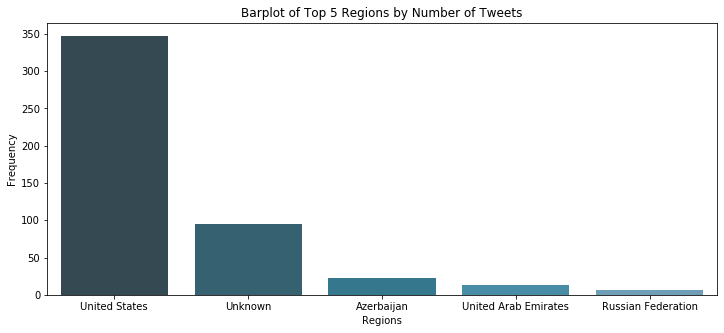

In [119]:
# seaborn countplot on the top 5 authors
N = 5
plt.figure(figsize=(12,5))
sns.set_palette('PuBuGn_d')
sns.barplot(x = list(top5_reg.index), y = top5_reg)
plt.title('Barplot of Top ' + str(N) + ' Regions by Number of Tweets')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.show()

In [124]:
#Get top 5 users by followers
sorted_df = output_df.sort_values('followers',ascending = False)
sorted_df

,author,dates,category,language,regions,followers,sentiment_value,keywords,entity_names,entity_types,tweet_text_translated,Sentiment_Cat
64,NOVOSTIMSK,8/8/2017 7:47,NonEnglish,Russian,Unknown,204510,0.500000,"[Ð ̧ññ Ð, Ññð º Ð, Ð ÑÐ ̧ ÑÐ1, ñ Ð1, ñð ̧ð ̧ d...","[°, 1, 4, 3, https://t.co/zG2ujZX447]","[Quantity, Quantity, Quantity, Quantity, URL]",ÐÐ3/4ñð º Ð ² Ð ÑÐ ̧ ÑÐ1/4ð3/4Ð ³ Ññ Ð ¿Ñðμð ÷...,Neutral
408,KADIROVRUSSIA,10/6/2017 10:29,NonEnglish,Russian,United States,109790,0.500000,"[Ð º Ññ Ð º Ð, Ñ D º Ð, ñð ̧ñ Ñð, ÑÐΜD, ÑÑÑÑÐ3...","[1, °, 4]","[Quantity, Quantity, Quantity]",Ðd ¶ 1/2ðμ · Ð1/2ð ° Ñ D º Ð ° Ð º Ññ Ð º Ð ° ...,Neutral
273,KADIROVRUSSIA,8/28/2017 15:17,NonEnglish,Russian,United States,106400,0.500000,"[Ð ̧ð, ÐμÐ1, ñð ̧ñ, Ð3, ñðd, ññð, Ðμñññ, Ðð1]",[°],[Quantity],Ðð1/2ñðd» D» Ð ̧ð ³ ÐμÐ1/2ñð ̧ñ ² Ð3/4Ð · Ð1/4...,Neutral
358,KADIROVRUSSIA,11/9/2016 8:48,NonEnglish,Russian,United States,94857,0.500000,[Ðñðμ ÑÐ],"[°, https://t.co/5o1XyasULV]","[Quantity, URL]",Ðñðμ ÑÐ ° Ð º. https://t.co/5o1XyasULV,Neutral
200,KADIROVRUSSIA,9/5/2016 12:19,NonEnglish,Russian,United States,93911,0.500000,"[2ð3, ðμ1, Ñðμð, ñð º]","[22, °, Ontario, https://t.co/IBRZFZtezp]","[Quantity, Quantity, Location, URL]",22 Ð ³ Ð3/4ð ° Ñðμð ± ðμ1/2ð3/4ñð º Ñ.. https:...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
88,FEYYLOGAYYLO,7/24/2015 14:00,NonEnglish,Russian,Unknown,1,0.500000,"[ñð º Ð ̧, Ð1, Ðμñð, YEN]","[€, 3, °, http://t.co/CmNIt0pox6]","[Quantity, Quantity, Quantity, URL]",◦ § DID YOU GET THE YEN ¬ Â € ¦®--DID YOU? Ð o...,Neutral
393,CHRISTINAPOOL61,7/21/2016 11:27,NonEnglish,German,Germany,0,0.237738,"[child benefit, child allowance, work, family,...",[Angela Merkel],[Person],#Merkel has improved the freedom of choice bet...,Moderately Negative
177,CHIRRMORRE,8/26/2017 23:49,RightTroll,English,Unknown,0,0.500000,"[Trump Supporter, Antifa HUNTS]","[Antifa HUNTS, Donald Trump, Fan (person), Bea...","[Organization, Person, Other, Person, URL, URL]",Watch as Antifa HUNTS DOWN a Trump Supporter t...,Neutral
53,CHIRRISMOGUI,8/25/2017 19:04,RightTroll,English,United States,0,0.089266,"[Judge Rules, Antifa]","[https://t.co/Njz0tWCWc3, https://t.co/iHJ5FZ7...","[URL, URL]",BREAKING : Judge Rules Against Antifa! https:/...,Strong Negative


In [128]:
authors_sorted = sorted_df.author.unique()
authors_sorted


array(['NOVOSTIMSK', 'KADIROVRUSSIA', 'TODAYNYCITY', 'JENN_ABRAMS',
       'CRYSTAL1JOHNSON', 'LUGANSKNOVOSTI', 'NOVOSTINSK',
       'THEFOUNDINGSON', 'COMRADZAMPOLIT', 'LAVROVMUESLI', 'TEN_GOP',
       'WASHINGTONLINE', 'USA_GUNSLINGER', 'RUOPENTWIT', 'PAMELA_MOORE13',
       'NEWORLEANSON', 'MAXDEMENTIEV', 'NOVOSTICRIMEA', 'KANSASDAILYNEWS',
       'ANDYHASHTAGGER', 'CHICAGODAILYNEW', 'ZUBOVNIK', 'SANANTOTOPNEWS',
       'CHRIXMORGAN', 'DAILYLOSANGELES', 'TODAYINSYRIA', 'MARGOSAVAZH',
       'TODAYMIAMI', 'ONLINEMEMPHIS', 'PIGEONTODAY', 'DETROITDAILYNEW',
       'DALLASTOPNEWS', 'DAILYSANDIEGO', 'BLACKMATTERSUS', 'DAILYSANFRAN',
       'TODAYPITTSBURGH', 'PHILADELPHIAON', 'SEATTLE_POST',
       'PHOENIXDAILYNEW', 'ELPASOTOPNEWS', 'BLEEPTHEPOLICE',
       'TODAYCLEVELAND', 'NEVNOV_RU', 'MANZAL_', 'SCREAMYMONKEY',
       'ONLINECLEVELAND', 'DAILYSANJOSE', 'ROOMOFRUMOR', 'RIAFANRU',
       'SPECIALAFFAIR', 'OAKLANDONLINE', 'RF_CHOICE', 'SOUTHLONESTAR',
       'STLOUISONLINE', 'INFOREACT

In [134]:
author = authors_sorted[0]
temp_df = sorted_df[sorted_df.author == author]
temp_df = temp_df.sort_values('followers', ascending = False)
follower_cnt = 

,author,dates,category,language,regions,followers,sentiment_value,keywords,entity_names,entity_types,tweet_text_translated,Sentiment_Cat
64,NOVOSTIMSK,8/8/2017 7:47,NonEnglish,Russian,Unknown,204510,0.5,"[Ð ̧ññ Ð, Ññð º Ð, Ð ÑÐ ̧ ÑÐ1, ñ Ð1, ñð ̧ð ̧ d...","[°, 1, 4, 3, https://t.co/zG2ujZX447]","[Quantity, Quantity, Quantity, Quantity, URL]",ÐÐ3/4ñð º Ð ² Ð ÑÐ ̧ ÑÐ1/4ð3/4Ð ³ Ññ Ð ¿Ñðμð ÷...,Neutral


In [135]:
top5_auths = authors_sorted[:5]
followers = []
for i in top5_auths:
    temp_df = sorted_df[sorted_df.author == i]#create subset
    temp_df = temp_df.sort_values('followers',ascending = False)#get most followers the author has had
    follower_cnt = temp_df['followers'].iloc[0]#Get first val
    followers.append(follower_cnt)#get first val
followers

[204510, 109790, 61944, 57187, 50273]

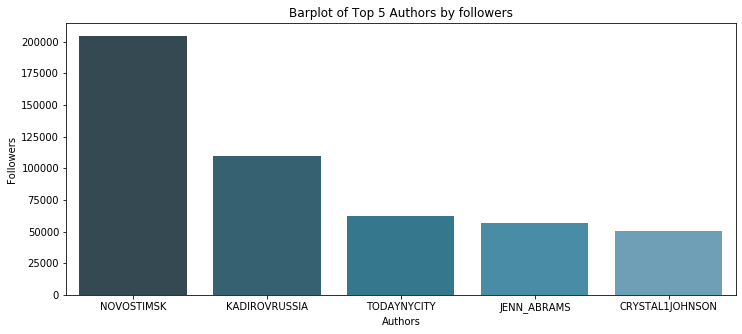

In [136]:
# seaborn countplot on the top 5 authors by followers
plt.figure(figsize=(12,5))
sns.set_palette('PuBuGn_d')
sns.barplot(x = top5_auths, y = followers)
plt.title('Barplot of Top ' + str(N) + ' Authors by followers')
plt.xlabel('Authors')
plt.ylabel('Followers')
plt.show()

In [138]:
len(output_df.regions.unique())

13

C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


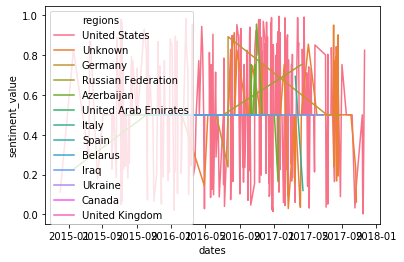

In [144]:
sns.lineplot(x="dates", y="sentiment_value", hue="regions", data=output_df)
plt.show()

In [153]:
output_df['dates'] = pd.to_datetime(output_df['dates'])
output_df['year'], output_df['month'] = output_df['dates'].dt.year, output_df['dates'].dt.month
output_df = output_df.set_index('dates')

In [168]:
output_df['SMA_30'] = output_df.sentiment_value.rolling(window=100).mean()


In [179]:
all_others = output_df[output_df.regions != 'United States']
all_others = all_others[all_others.regions != 'Unknown']
all_others.reset_index
all_others['SMA'] = all_others.sentiment_value.rolling(window = 7).mean()

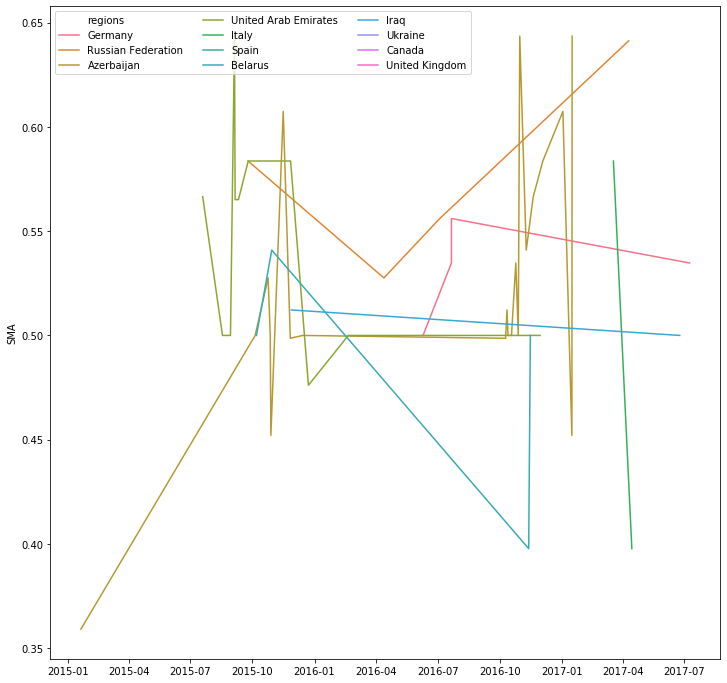

In [180]:
 
plt.figure(figsize=(12,12))
sns.lineplot(x=all_others.index.values, y="SMA", hue="regions", data=all_others, ci = None)
plt.legend(ncol=3, loc='upper left')
plt.show()